<a href="https://colab.research.google.com/github/vinayak2019/UK_Bootcamp/blob/main/2023/Exercises/Data_analysis_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Pandas DataFrame**

The pandas DataFrame is a table - it has rows with index and columns with headers. Each column is a pandas.Series object The required columnar data can be accessed with dot notation or subscripting. The row data can be accessed with iloc or loc method.


In [ ]:
# Let's import the package
import pandas as pd

## **Importing Comma Separated Files (CSV)**

We will use the *read_csv* function from pandas to read a CSV file. You can even read Excel file and other formats

In [ ]:
# get the CSV file
! wget https://raw.githubusercontent.com/vinayak2019/UK_Bootcamp/main/2023/Exercises/UK_Bootcamp.csv

In [ ]:
# Read the CSV file
df = pd.read_csv("UK_Bootcamp.csv")

# Look at table
df

## **Data analysis**


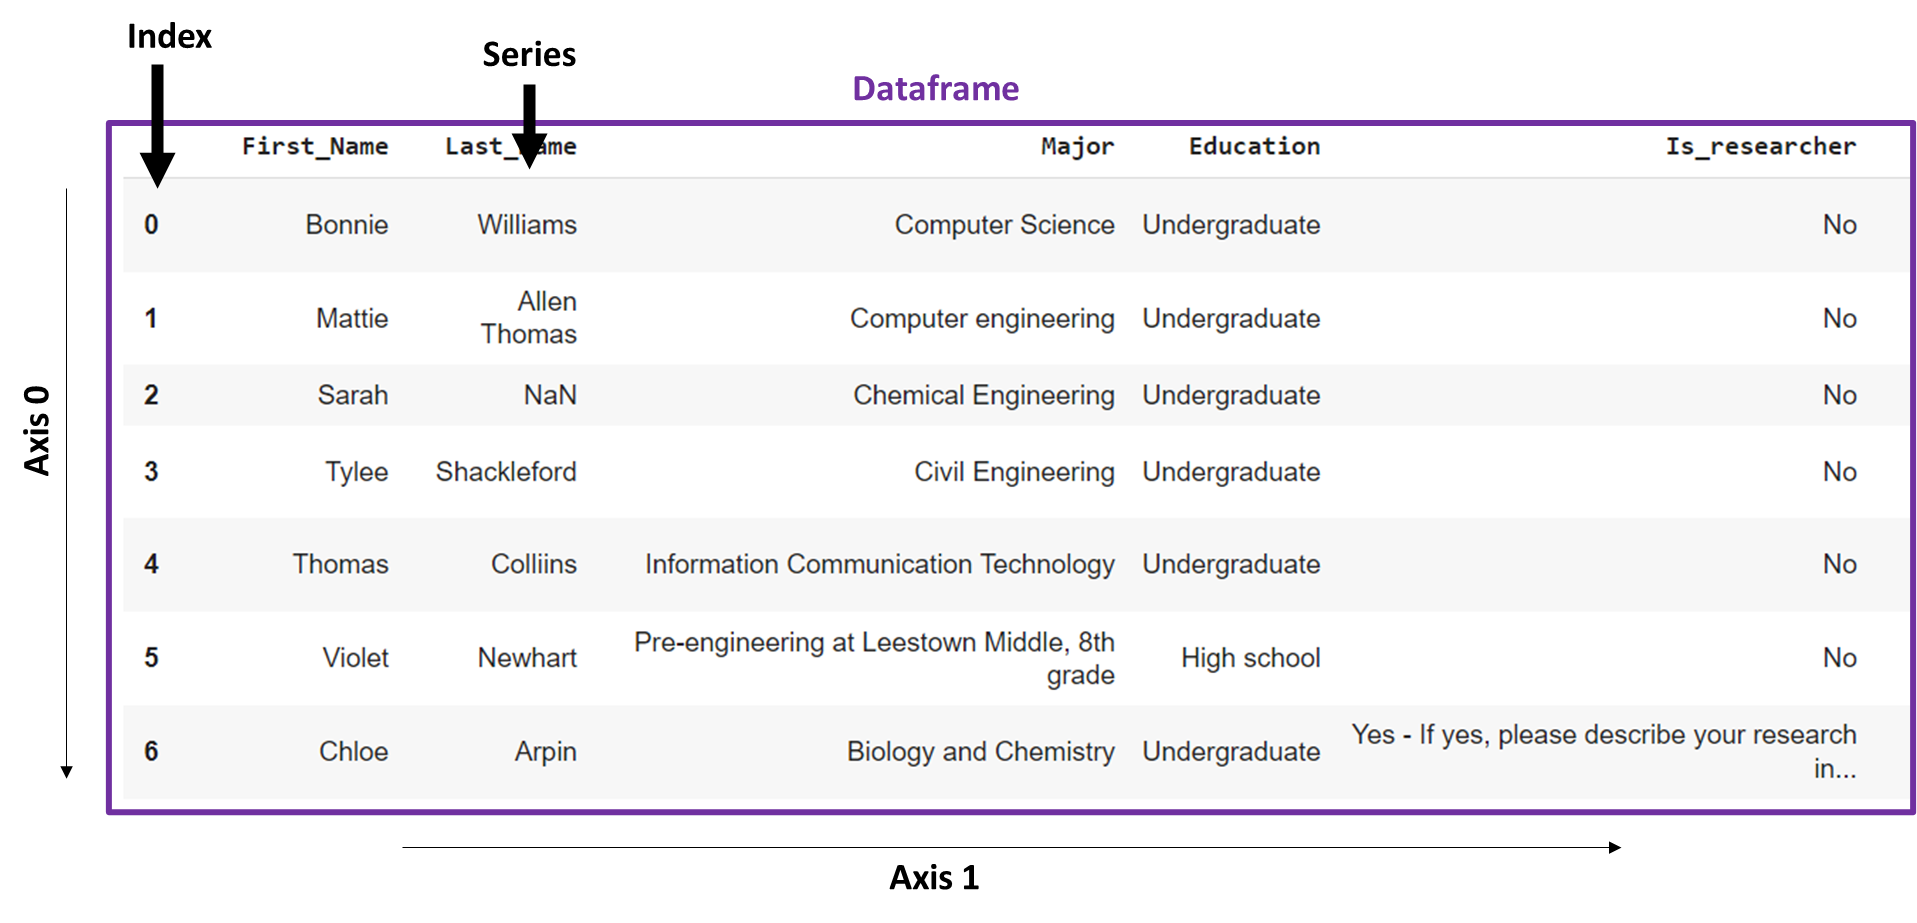

## Getting rows
Task: Get the details for participant with first name Bonnie

The default index starts with 0. We will set the *First_Name* symbol column as the index. Note, index should be unique.


In [ ]:
new_df = df.set_index("First_Name")
new_df.head()

You can search the index with loc() method.

In [ ]:
# To get the row where the name is Bonnie
new_df.loc["Bonnie"]

You can get a row if you know the row number with iloc() method. The row number starts from 0.

In [ ]:
# Unlike loc which checks for the value in the index, iloc uses the row number
# row number starts with 0
new_df.iloc[2]

The columns (Series) can be obtained by subscripting

In [ ]:
df["Education"]

The details for Bonnie can also be retrieved by applying conditions. The general syntax is

`df[(condition_1)]`

In [ ]:
df[(df["First_Name"] == "Bonnie")]

You can also have multiple conditions with *and* (&), *or* (|)

In [ ]:
df[(df["Is_researcher"] == "No") & (df["Major"] == "Computer Science")]

### Missing data

Task: Remove missing data from Education column

There is *dropna* method which can remove missing data. The subset argument can be used to specify the column name

In [ ]:
# Getting the column name
df.columns

In [ ]:
df.dropna(subset=["Education"])

Note: Only NaN values from the column Education are removed not all columns. If you want to remove all NaN, omit the subset=["Education"] argument.

# **Exercise**

## Count the number of participants who are not researchers in the original dataframe.


Pseudo code:
1. Create a variable "not_researchers" and assign it the dataframe obtained by applying condition Is_researcher = No.
2. Use the count() methods on the "not_researchers" dataframe.


In [ ]:
# YOUR CODE HERE

## Set the column with Last_Name as the index of the original dataframe


In [ ]:
# YOUR CODE HERE

## Get a dataframe of Undergradaute students

In [ ]:
# YOUR CODE HERE

## Get the 15th entry in the original dataframe

In [ ]:
# YOUR CODE HERE

## Get the details for participant with last name Hawkins.

In [ ]:
# YOUR CODE HERE

## **Groupby method**


The filtering process discussed above is sometime redundant. If you want dataframe undergraduate and graduate students, you will have to perform the filtering twice.

The groupby() method reduces the redundancy when used with get_group(). Here we will group by Education

In [ ]:
# Group participants by Education
# Here we first group data by Education and get the entries in Graduate.
# The resultant object is another dataframe

education_group = df.groupby(["Education"])

In [ ]:
education_group.get_group("Graduate")

There are several methods available for a DataFrame and Series. Use *dir* on the DataFrame object to list the methods

##**EXERCISE**

Using the dataframe 'df', create a new dataframe without any NaN values. (Hint: Use dropna). Then with the new dataframe, group by majors and get participants who are Linguistics major


In [ ]:
# Create the clean dataframe with dropna
clean_df = # YOUR CODE HERE
clean_df.head()

In [ ]:
# Use groupby on Major
major_group = # YOUR CODE HERE

In [ ]:
# Get group of Linguistics majors
linguistics = # YOUR CODE HERE

Get list of participants who are Graduates and non-programmers.

Hint: Use a list of arguments ["Education","Is_programmer"] in groupby instead of a single argument "Education" we use before. To get the group of graduates and non-programmers, use the corresponding labels as a tuple ("Graduate","No")

In [ ]:
# YOUR CODE HERE

## **Saving the dataframe**

We will save the s block dataframe as a CSV file. The format can be excel too.

In [ ]:
graduates = education_group.get_group("Graduate")
graduates.to_csv("graduates.csv")

# Practice

You will use the historical stock data for Tesla and determine the following:

1. Maximum and minimum value at Open during the time period
2. The average Close value for the time period
3. The difference between the High and Low for each day

Also create a dataframe with data for all Mondays in the time period.

The loading of the data is done for you.

In [ ]:
# Get sample data for plotting
! wget https://raw.githubusercontent.com/vinayak2019/UK_Bootcamp/main/2023/Exercises/TSLA.csv

# read the data into pandas DataFrame
import pandas as pd

df = pd.read_csv("TSLA.csv")
df

### Find max and min value at Open

Hint: Use the min() and max() methods on the Open column (series)

In [ ]:
# YOUR CODE HERE

### Average Close value

Hint: use the describe() method on the Close column (Series)

In [ ]:
# YOUR CODE HERE

### Difference between High and Low for each day

Hint: Similar to subtracting numbers. Use the respective columns (Series)

In [ ]:
# YOUR CODE HERE

### (HARD) Group dataframe by days of week


Hint: You need to convert the str values in the Date column to *datetime* objects. This can be achieved with the following code.

```
df["Date"] = df["Date"].apply(pd.to_datetime)
```

Here, apply() is a method that takes in a function and applies it to all column entries.


For each of the datetime object in the Date column, you can get the day using the follwoing code:

```
def get_day(date):
    return date.day_name()

df["Day"] = df["Date"].apply(get_day)

```

The day_name() method of the datetime object will you the name of the day. User dir() of a datetime object to know what other methods are available.

Finally, use the group_by() method to group by Day and get the dataframe for Monday.



In [ ]:
# YOUR CODE HERE